# Bases: mudando o referencial

Este capítulo está ligado ao seguintes objetivos didáticos do curos:
1. Avaliar e resolver sistemas de equações lineares
1. Interpretar e analisar transformações lineares

Referência bibliográfica: [Jim Hefferon - Linear Algebra - 4th Edition](https://hefferon.net/linearalgebra/) - Chap. Three, V-VI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Parte 1

# Exercício 1
**Objetivo: entender pixels como vetores em 3 dimensões**

Uma imagem digital é composta de pequenos pontinhos chamados pixels. Os pixels se organizam numa grade semelhante a uma matriz. Um pixel tem uma representação da cor que deve ser "pintada" naquele pontinho específico.

Uma das possíveis representações de cores é a RGB. Nessa representação, cores são representadas por três números, cada um deles correspondente à intensidade das componentes R (red - vermelho), G (green - verde) e B (blue - azul).

Como já vimos, a função `imread` abre uma imagem na forma de um `np.array` com as dimensões *altura*, *largura* e *cores*:

In [2]:
image = mpimg.imread("rio_de_janeiro.jpg")
altura, largura, cores = image.shape

Podemos enfileirar nossos pixels em uma matriz com um pixel por coluna e uma cor por linha usando a instrução `reshape` e a transposição:

In [3]:
X = image.reshape(altura*largura, cores).T
print(X.shape)
print("Pixel na posição (0,10) na imagem: ", image[0,10,:])
print("Pixel na coluna 10 na lista: ", X[:,10])
print("Primeiras 11 colunas da lista:")
print(X[:, :11])

(3, 273280)
Pixel na posição (0,10) na imagem:  [37 27 25]
Pixel na coluna 10 na lista:  [37 27 25]
Primeiras 11 colunas da lista:
[[27 27 28 29 27 27 29 29 32 33 37]
 [23 23 24 25 26 26 25 25 27 28 27]
 [22 22 23 24 24 24 24 24 24 25 25]]


Depois, podemos voltar nossa matriz X para o formato de uma imagem, de forma que conseguimos desenhá-la na tela:

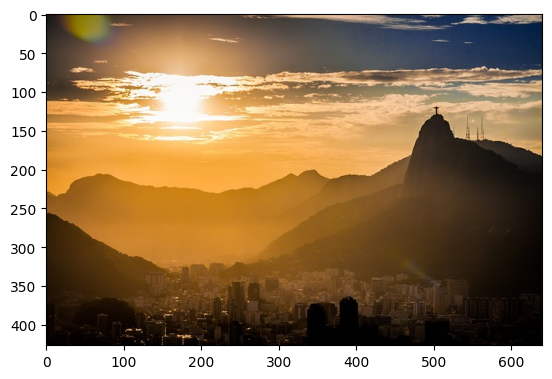

In [4]:
Y = X.T.reshape(altura, largura, cores)
plt.figure()
plt.imshow(Y)
plt.show()

Altere os códigos acima para que, *usando uma multiplicação matricial*, as componentes R e G da imagem sejam multiplicadas por 0.5. Dica: use a matriz `A` abaixo!

Dica 2: provavelmente você precisará usar o método `astype(int)` antes de mostrar sua imagem na tela!

In [5]:
# Dica: use esta matriz para fazer a transformação:
A = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 1]])

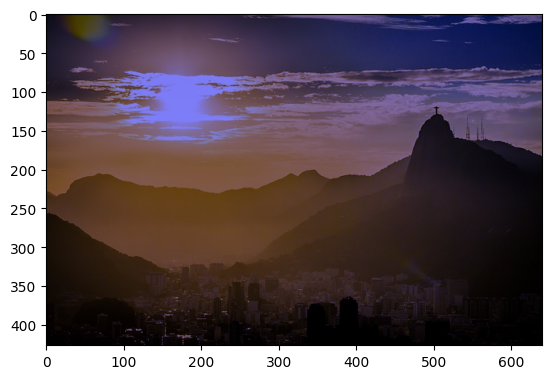

In [6]:
# Solução
X_y = A @ X
Y_y = X_y.T.reshape(altura, largura, cores).astype(int)
plt.figure()
plt.imshow(Y_y)
plt.show()

# Exercício 2
**Objetivo: transformar uma imagem para o espaço YIQ**

O formato RGB nem sempre é o mais eficiente para todas as aplicações. Na época da TV analógica, o padrão NTSC usava o formato [YIQ](https://en.wikipedia.org/wiki/YIQ). Nesse formato, a componente Y é chamada de *luma*, e representa o brilho do pixel; as componentes I e Q representam a crominância, isto é, a cor do pixel, distribuída num espaço 2D.

Para mapear um pixel $x$ no formato RGB para um pixel $y$ no formato YIQ, é preciso fazer uma multiplicação matricial:

$$
y = Ax
$$

onde a matriz $A$ é pré-definida como abaixo:

In [7]:
A = np.array( [[0.299, 0.587, 0.144], [0.5959, -0.2746, -0.3213], [0.2115, -0.5227, 0.3112]] )

Sabendo disso:

1. Faça um programa que converte uma imagem em RGB para uma imagem em YIQ.
2. Em seu programa, acrescente uma multiplicação matricial que remove (multiplica por zero) as componentes I e Q
3. Após, faça seu programa retornar a imagem para RGB
4. Por fim, seu programa deve mostrar a imagem resultante na tela. Se precisar, use o método `.astype(int)` para que sua matriz seja convertida para números inteiros!

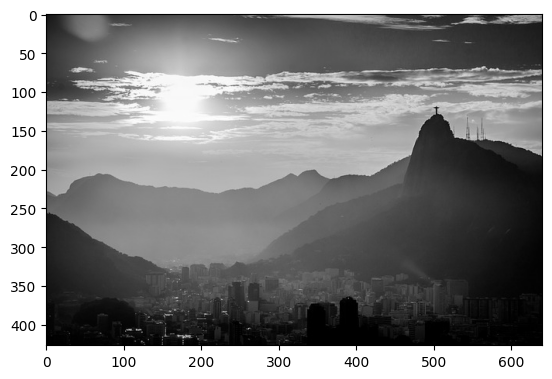

In [8]:


X = image.reshape(altura*largura, cores).T


# ----
# Solução
Xyiq = A @ X # (Transforma em YIQ)
R = np.array([[1, 0, 0], [0, 0 , 0], [0, 0, 0]]) # Remove I e Q
X_ = R @ Xyiq
Xrgb = np.linalg.inv(A) @ X_ # Volta para RGB
Xrgb = Xrgb.astype(int)
# ----


image_ = Xrgb.T.reshape(altura, largura, cores).astype(int)
plt.figure()
plt.imshow(image_)
plt.show()

# Exercício 3
**Objetivo: formular matematicamente o procedimento de conversão**

No exercício anterior, executamos três multiplicações matriciais:

* A primeira, para converter a representação de RGB para YIQ;
* A segunda, para retirar as componentes I e Q;
* A terceira, para voltar a representação de YIQ para RGB.

1. Essas operações podem ser escritas como: $X' = A^{-1} R A X$. Associe cada uma dessas matrizes às suas respectivas operações.
2. Encontre uma única matriz $M$ que realiza as três operações simultaneamente, isto é, $X' = M X$. 
3. Substitua as operações no código do exercício anterior para que somente a matriz $M$ seja usada.

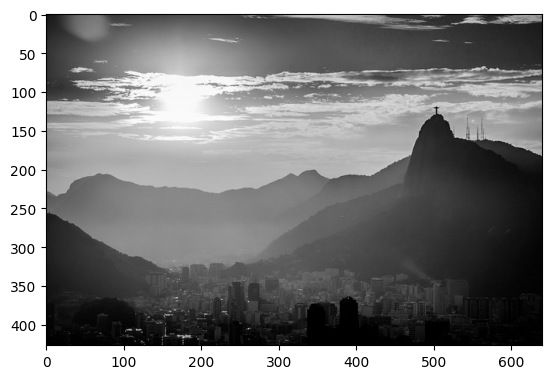

In [9]:
X = image.reshape(altura*largura, cores).T


# ----
# Solução
R = np.array([[1, 0, 0], [0, 0 , 0], [0, 0, 0]]) # Remove I e Q
M = np.linalg.inv(A) @ R @ A
Xrgb = M @ X
Xrgb = Xrgb.astype(int)
# ----


image_ = Xrgb.T.reshape(altura, largura, cores).astype(int)
plt.figure()
plt.imshow(image_)
plt.show()

# Exercício 4
**Aplicar um procedimento de distorção de cores**

Faça um código que, usando uma única multiplicação matricial:

1. Lê uma imagem em RGB,
2. Reduz sua componente luma (Y) para 20% do valor inicial,
3. Troca os valores das compontentes I e Q
4. Mostra a imagem resultante na tela.

Se você usar a imagem do Rio de Janeiro que temos usado como exemplo, provavelmente vai encontrar uma saída parecida com:

<img src='resultado_distorcao.png'>



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-52..199].


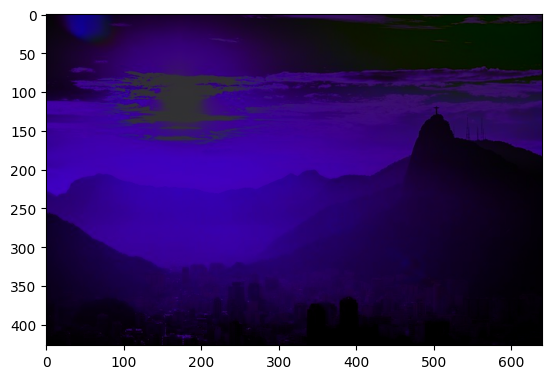

In [10]:
# Faça seu código aqui
X = image.reshape(altura*largura, cores).T


# ----
# Solução
R = np.array([[0.2, 0, 0], [0, 0 , 1], [0, 1, 0]])
M = np.linalg.inv(A) @ R @ A
Xrgb = M @ X
Xrgb = Xrgb.astype(int)
# ----


image_ = Xrgb.T.reshape(altura, largura, cores).astype(int)
plt.figure()
plt.imshow(image_)
plt.show()

# Exercício 5
**Objetivo: fazer uma transformação de coordenadas usando referenciais**

Em algumas situações, não sabemos a priori qual é a matriz de transformações que realiza a transformação que desejamos. Um caso clássico disso é quando mapeamos quilômetros para pixels ao fazer um mapa digital. Em algumas situações, é possível pensar na transformação como uma concatenação de outras transformações (por exemplo, quando trata-se de uma translação seguida de uma rotação seguida de um cisalhamento). Em outras situações, temos apenas algumas referências.

Uma referência, neste caso, é quando dizemos: o vetor $[v_1, v_2]$ deve ser mapeado para o vetor $[w_1, w_2]$.

Se temos duas referências, então sabemos que:
* $[v_1^1, v_2^1] \rightarrow [w_1^1, w_2^1]$
* $[v_1^2, v_2^2] \rightarrow [w_1^2, w_2^2]$

e isso pode ser escrito na forma de matrizes:
$$
\begin{bmatrix}
v_1^1 \\
v_2^1
\end{bmatrix}
=
B

\begin{bmatrix}
w_1^1 \\
w_2^1
\end{bmatrix}

\hspace{0.1in}
\text{e}
\hspace{0.1in}

\begin{bmatrix}
v_1^2 \\
v_2^2
\end{bmatrix}
=
B

\begin{bmatrix}
w_1^2 \\
w_2^2
\end{bmatrix}
$$

As duas equações podem ser colocadas numa única, e então resolvemos:

$$
\begin{bmatrix}
v_1^1 & v_1^2\\
v_2^1 & v_2^2
\end{bmatrix}
=
B

\begin{bmatrix}
w_1^1 & w_1^2\\
w_2^1 & w_2^2
\end{bmatrix}

\\

V = BW\\
B = VW^{-1}
$$

Encontramos, então, a matriz de transformações $B$ que mapeia pontos em $\mathbb{R}_v$ para pontos correspondentes $\mathbb{R}_w$. Porém, veja, se usamos $B$ nesta forma, não somos capazes de representar translações! Para isso, precisamos de pontos em coordenadas homogêneas, e>


$$
\begin{bmatrix}
v_1^1 & v_1^2\\
v_2^1 & v_2^2\\
1 & 1
\end{bmatrix}
=
B

\begin{bmatrix}
w_1^1 & w_1^2\\
w_2^1 & w_2^2\\
1 & 1
\end{bmatrix}
$$

Veja que, nesse caso, não podemos fazer a operação $B = VW^{-1}$ porque a matriz $W$ não é quadrada. Então, precisaremos de mais um ponto:

$$
\begin{bmatrix}
v_1^1 & v_1^2 & v_1^3\\
v_2^1 & v_2^2 & v_2^3\\
1 & 1 & 1
\end{bmatrix}
=
B

\begin{bmatrix}
w_1^1 & w_1^2 & w_1^3\\
w_2^1 & w_2^2 & w_2^3\\
1 & 1 & 1
\end{bmatrix}
$$

e isso nos permite calcular:

$$
V = BW\\
B = VW^{-1}
$$

Então, o que fizemos na verdade foi mapear vértices de um triângulo para vértices de outro triângulo! Na figura abaixo, temos um exemplo de mapeamento desse tipo, mostrando os pontos que foram usados como referência, junto a uma núvem de pontos no espaço original $\mathbb{R}_v$ e a núvem correspondente no espaço transformado $\mathbb{R}_w$: 

<img src='mapeamento_triangulos.png'>


Com isso em mente, encontre transformações à partir das referências abaixo. Se necessário, adicione uma dimensão aos pontos para tratar a translação.

(a) encontre uma transformação à partir das referências:

* $[0, 1] \rightarrow [0.5, 0.5]$
* $[1, 1] \rightarrow [0.7, 0.1]$

(b) lembrando de adicionar uma dimensão para a translação, encontre uma transformação à partir das referências:

* $[0, 0] \rightarrow [1, 1]$
* $[0, 1] \rightarrow [1.5, 1.5]$
* $[1, 1] \rightarrow [1.7, 1.1]$

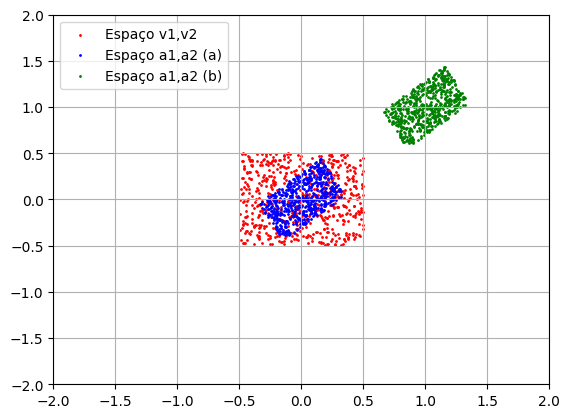

In [11]:
# Comece com esse código inicial!
x = np.random.uniform(-0.5, 0.5, size=(2, 600))

# Altere daqui para baixo
# -----------------
# Na questão (b), lembre-se de adicionar a linha de "1" à matriz x:
# x = np.vstack ( (x, np.ones(600)) )

# Solução (a)
X = np.array([ [0, 1],[1, 1]]).T
V = np.array([[0.5, 0.5], [0.7, 0.1]]).T
# V = AX -> A = V X^-1
A = V @ np.linalg.inv(X)
v = A @ x

# Solução (b)
X = np.array([ [0, 0, 1],[0, 1, 1], [1, 1, 1]]).T
W = np.array([[1, 1, 1], [1.5, 1.5, 1], [1.7, 1.1, 1]]).T
# W = AX -> A = W X^-1
A = W @ np.linalg.inv(X)
x_ = np.vstack ( (x, np.ones(600)) )
w = A @ x_

# -----------------
# Altere daqui para cima

plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r', label='Espaço v1,v2')
plt.scatter(v[0,:], v[1,:], s=1, c='b', label='Espaço a1,a2 (a)')
plt.scatter(w[0,:], w[1,:], s=1, c='g', label='Espaço a1,a2 (b)')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.legend()
plt.show()

# Exercício 6
*Objetivo: aplicar a transformação definida por dados a um espaço de cores*

Gostaríamos de definir um mapeamento $A$ tal que um pixel com cores $\begin{bmatrix}r \\ g \\ b \end{bmatrix}$ é mapeado para:

$$
\begin{bmatrix}r_a \\ g_a \\ b_a\end{bmatrix} = A \begin{bmatrix}r \\ g\\ b\end{bmatrix}
$$

Sabemos que queremos os seguintes mapeamentos:

$$
\begin{bmatrix} 255 \\ 0 \\ 0 \end{bmatrix} \Rightarrow \begin{bmatrix} 90 \\ 100 \\ 0 \end{bmatrix}\hspace{1cm}
\begin{bmatrix} 0 \\ 100 \\ 90 \end{bmatrix} \Rightarrow \begin{bmatrix} 0 \\ 150 \\ 20 \end{bmatrix}\hspace{1cm}
\begin{bmatrix} 200 \\ 0 \\ 200 \end{bmatrix} \Rightarrow \begin{bmatrix} 20 \\ 100 \\ 200 \end{bmatrix}\hspace{1cm}
\begin{bmatrix} 0 \\ 0 \\ 3 \end{bmatrix} \Rightarrow \begin{bmatrix} 50 \\ 20 \\ 10 \end{bmatrix}
$$


(a) Encontre a matriz $A$

(b) Aplique a transformação de cores sobre a imagem do Rio de Janeiro que usamos nesta aula





In [12]:
# Encontrando matriz A

# Solução (b)
X = np.array([ [255, 0, 0, 1], [0, 100, 90, 1], [200, 0, 200, 1], [0, 0, 3, 1]]).T
Y = np.array([ [90, 100, 0, 1], [0, 150, 20, 1], [20, 100, 200, 1], [50, 20, 10, 1]]).T

# Y = AX -> A = Y X^-1
A = Y @ np.linalg.inv(X)
print(A)

[[ 1.53240877e-01 -2.32162880e-01 -3.07858759e-01  5.09235763e+01]
 [ 3.14743779e-01  1.22469755e+00  8.65545392e-02  1.97403364e+01]
 [-2.75400807e-02 -7.63411036e-01  9.92426478e-01  7.02272057e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-96..434].


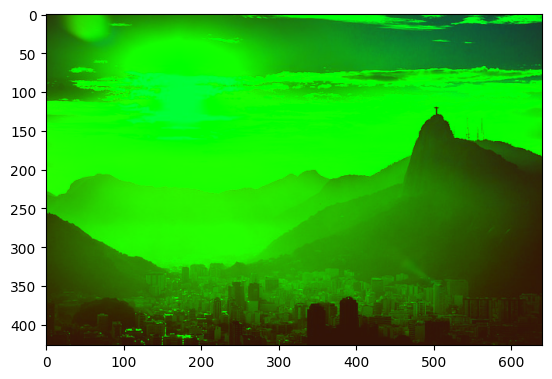

In [13]:
# Aplicando a transformação de cores:
# Faça seu código aqui
x = image.reshape(altura*largura, cores).T
x = np.vstack ( (x, np.ones(altura*largura)) )

# ----
# Solução
y = A @ x
y = y[:3,:]
y = y.astype(int)
# ----


image_ = y.T.reshape(altura, largura, cores).astype(int)
plt.figure()
plt.imshow(image_)
plt.show()